In [1]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import csv

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def result_data(setsu):
    url = 'https://soccer.yahoo.co.jp/jleague/schedule/j1/' + str(setsu) + '/all'
    html = urlopen(url)
    bsObj = BeautifulSoup(html, "html.parser")
    table = bsObj.findAll("table")[0]

    rows = table.findAll("tr")

    csvFile = open("result" + str(setsu) + ".csv", 'wt', newline = '', encoding = 'utf-8')
    writer = csv.writer(csvFile)

    try:
        for row in rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            writer.writerow(csvRow)
    finally:
        csvFile.close()



In [3]:
for setsu in range(1, 35):
    result_data(setsu)

In [4]:
df = []

In [5]:
for setsu in range(1, 35):
    df.append(pd.read_csv("result" + str(setsu) + ".csv"))

In [6]:
df[0]

,キックオフ,ホーム,試合状況,アウェイ,試合会場
0,2/22（金）19:30,\nC大阪\n,\n1 - 0\n試合終了\nハイライト動画\n,\n神戸\n,ヤンマー
1,2/23（土）14:00,\n仙台\n,\n0 - 0\n試合終了\nハイライト動画\n,\n浦和\n,ユアスタ
2,2/23（土）14:00,\n川崎F\n,\n0 - 0\n試合終了\nハイライト動画\n,\nFC東京\n,等々力
3,2/23（土）14:00,\n広島\n,\n1 - 1\n試合終了\nハイライト動画\n,\n清水\n,Eスタ
4,2/23（土）14:00,\n鳥栖\n,\n0 - 4\n試合終了\nハイライト動画\n,\n名古屋\n,駅スタ
5,2/23（土）15:00,\n鹿島\n,\n1 - 2\n試合終了\nハイライト動画\n,\n大分\n,カシマ
6,2/23（土）15:00,\n磐田\n,\n1 - 1\n試合終了\nハイライト動画\n,\n松本\n,ヤマハ
7,2/23（土）15:00,\nG大阪\n,\n2 - 3\n試合終了\nハイライト動画\n,\n横浜FM\n,パナスタ
8,2/23（土）16:00,\n湘南\n,\n2 - 0\n試合終了\nハイライト動画\n,\n札幌\n,BMWス


In [7]:
result = pd.concat([df[0], df[1], df[2], df[3], df[4], df[5], df[6], df[7], df[8], df[9], 
           df[10], df[11], df[12], df[13], df[14], df[15], df[16], df[17], df[18], df[19], 
           df[20], df[21], df[22], df[23], df[24], df[25], df[26], df[27], df[28], df[29], 
           df[30], df[31], df[32], df[33]]).reset_index()

In [8]:
result['アウェイ'] = result['アウェイ'].str.replace('\n', '')
result['ホーム'] = result['ホーム'].str.replace('\n', '')
result['試合状況'] = result['試合状況'].str.replace('\n', '')
result['試合状況'] = result['試合状況'].str.replace('試合終了ハイライト動画', '')

In [9]:
result

,index,キックオフ,ホーム,試合状況,アウェイ,試合会場
0,0,2/22（金）19:30,C大阪,1 - 0,神戸,ヤンマー
1,1,2/23（土）14:00,仙台,0 - 0,浦和,ユアスタ
2,2,2/23（土）14:00,川崎F,0 - 0,FC東京,等々力
3,3,2/23（土）14:00,広島,1 - 1,清水,Eスタ
4,4,2/23（土）14:00,鳥栖,0 - 4,名古屋,駅スタ
5,5,2/23（土）15:00,鹿島,1 - 2,大分,カシマ
6,6,2/23（土）15:00,磐田,1 - 1,松本,ヤマハ
7,7,2/23（土）15:00,G大阪,2 - 3,横浜FM,パナスタ
8,8,2/23（土）16:00,湘南,2 - 0,札幌,BMWス
9,0,3/1（金）19:00,川崎F,1 - 1,鹿島,等々力


In [10]:
result['date'] = result['キックオフ'].str[:-8]

In [11]:
fin = result.query("試合状況!='                    -          '")
fin = fin[:306]
fin

,index,キックオフ,ホーム,試合状況,アウェイ,試合会場,date
0,0,2/22（金）19:30,C大阪,1 - 0,神戸,ヤンマー,2/22
1,1,2/23（土）14:00,仙台,0 - 0,浦和,ユアスタ,2/23
2,2,2/23（土）14:00,川崎F,0 - 0,FC東京,等々力,2/23
3,3,2/23（土）14:00,広島,1 - 1,清水,Eスタ,2/23
4,4,2/23（土）14:00,鳥栖,0 - 4,名古屋,駅スタ,2/23
5,5,2/23（土）15:00,鹿島,1 - 2,大分,カシマ,2/23
6,6,2/23（土）15:00,磐田,1 - 1,松本,ヤマハ,2/23
7,7,2/23（土）15:00,G大阪,2 - 3,横浜FM,パナスタ,2/23
8,8,2/23（土）16:00,湘南,2 - 0,札幌,BMWス,2/23
9,0,3/1（金）19:00,川崎F,1 - 1,鹿島,等々力,3/1


In [12]:
fin['away_score'] = fin['試合状況'].str[0]
fin['home_score'] = fin['試合状況'].str[4]

In [13]:
fin.head()

,index,キックオフ,ホーム,試合状況,アウェイ,試合会場,date,away_score,home_score
0,0,2/22（金）19:30,C大阪,1 - 0,神戸,ヤンマー,2/22,1,0
1,1,2/23（土）14:00,仙台,0 - 0,浦和,ユアスタ,2/23,0,0
2,2,2/23（土）14:00,川崎F,0 - 0,FC東京,等々力,2/23,0,0
3,3,2/23（土）14:00,広島,1 - 1,清水,Eスタ,2/23,1,1
4,4,2/23（土）14:00,鳥栖,0 - 4,名古屋,駅スタ,2/23,0,4


In [14]:
away_point = []
for i in range(len(fin)):
    tmp = fin.iloc[i]
    if tmp['away_score'] < tmp['home_score']:
        away_point.append(3)
    elif tmp['away_score'] == tmp['home_score']:
        away_point.append(1)
    else:
        away_point.append(0)

In [15]:
home_point = []
for i in range(len(fin)):
    tmp = fin.iloc[i]
    if tmp['away_score'] > tmp['home_score']:
        home_point.append(3)
    elif tmp['away_score'] == tmp['home_score']:
        home_point.append(1)
    else:
        home_point.append(0)

In [16]:
fin['away_point'] = away_point
fin['home_point'] = home_point

In [17]:
teams = []
dates = []
scores = []

for i in range(len(fin)):
    tmp = fin.iloc[i]
    
    teams.append(tmp['アウェイ'])
    teams.append(tmp['ホーム'])
    
    dates.append('2019年' + tmp['date'])
    dates.append('2019年' + tmp['date'])
    
    scores.append(tmp['away_point'])
    scores.append(tmp['home_point'])

In [18]:
res = pd.DataFrame({ 'dates' : dates,
                        'teams' : teams,
                        'scores' : scores })

In [19]:
res['dates'] = pd.to_datetime(res['dates'], format='%Y年%m/%d')

In [20]:
res

,dates,teams,scores
0,2019-02-22,神戸,0
1,2019-02-22,C大阪,3
2,2019-02-23,浦和,1
3,2019-02-23,仙台,1
4,2019-02-23,FC東京,1
5,2019-02-23,川崎F,1
6,2019-02-23,清水,1
7,2019-02-23,広島,1
8,2019-02-23,名古屋,3
9,2019-02-23,鳥栖,0


In [21]:
team0 = res[res['teams'] == '川崎F']
team0 = team0.sort_values('dates')
team0['accum_scores'] = team0['scores'].cumsum()

In [22]:
team1 = res[res['teams'] == '広島']
team1 = team1.sort_values('dates')
team1['accum_scores'] = team1['scores'].cumsum()

In [23]:
team2 = res[res['teams'] == 'FC東京']
team2 = team2.sort_values('dates')
team2['accum_scores'] = team2['scores'].cumsum()

In [24]:
team3 = res[res['teams'] == '鹿島']
team3 = team3.sort_values('dates')
team3['accum_scores'] = team3['scores'].cumsum()

In [25]:
team4 = res[res['teams'] == '浦和']
team4 = team4.sort_values('dates')
team4['accum_scores'] = team4['scores'].cumsum()

In [26]:
team5 = res[res['teams'] == '札幌']
team5 = team5.sort_values('dates')
team5['accum_scores'] = team5['scores'].cumsum()

In [27]:
team6 = res[res['teams'] == '清水']
team6 = team6.sort_values('dates')
team6['accum_scores'] = team6['scores'].cumsum()

In [28]:
team7 = res[res['teams'] == '仙台']
team7 = team7.sort_values('dates')
team7['accum_scores'] = team7['scores'].cumsum()

In [29]:
team8 = res[res['teams'] == 'C大阪']
team8 = team8.sort_values('dates')
team8['accum_scores'] = team8['scores'].cumsum()

In [30]:
team9 = res[res['teams'] == 'G大阪']
team9 = team9.sort_values('dates')
team9['accum_scores'] = team9['scores'].cumsum()

In [31]:
team10 = res[res['teams'] == '横浜FM']
team10 = team10.sort_values('dates')
team10['accum_scores'] = team10['scores'].cumsum()

In [32]:
team11 = res[res['teams'] == '神戸']
team11 = team11.sort_values('dates')
team11['accum_scores'] = team11['scores'].cumsum()

In [33]:
team12 = res[res['teams'] == '湘南']
team12 = team12.sort_values('dates')
team12['accum_scores'] = team12['scores'].cumsum()

In [34]:
team13 = res[res['teams'] == '名古屋']
team13 = team13.sort_values('dates')
team13['accum_scores'] = team13['scores'].cumsum()

In [35]:
team14 = res[res['teams'] == '鳥栖']
team14 = team14.sort_values('dates')
team14['accum_scores'] = team14['scores'].cumsum()

In [36]:

team15 = res[res['teams'] == '松本']
team15 = team15.sort_values('dates')
team15['accum_scores'] = team15['scores'].cumsum()

In [37]:
team16 = res[res['teams'] == '磐田']
team16 = team16.sort_values('dates')
team16['accum_scores'] = team16['scores'].cumsum()

In [38]:
team17 = res[res['teams'] == '大分']
team17 = team17.sort_values('dates')
team17['accum_scores'] = team17['scores'].cumsum()

C:\Users\masaharu\Anaconda3\envs\ds2019\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5,1,'Transition of points 2019')

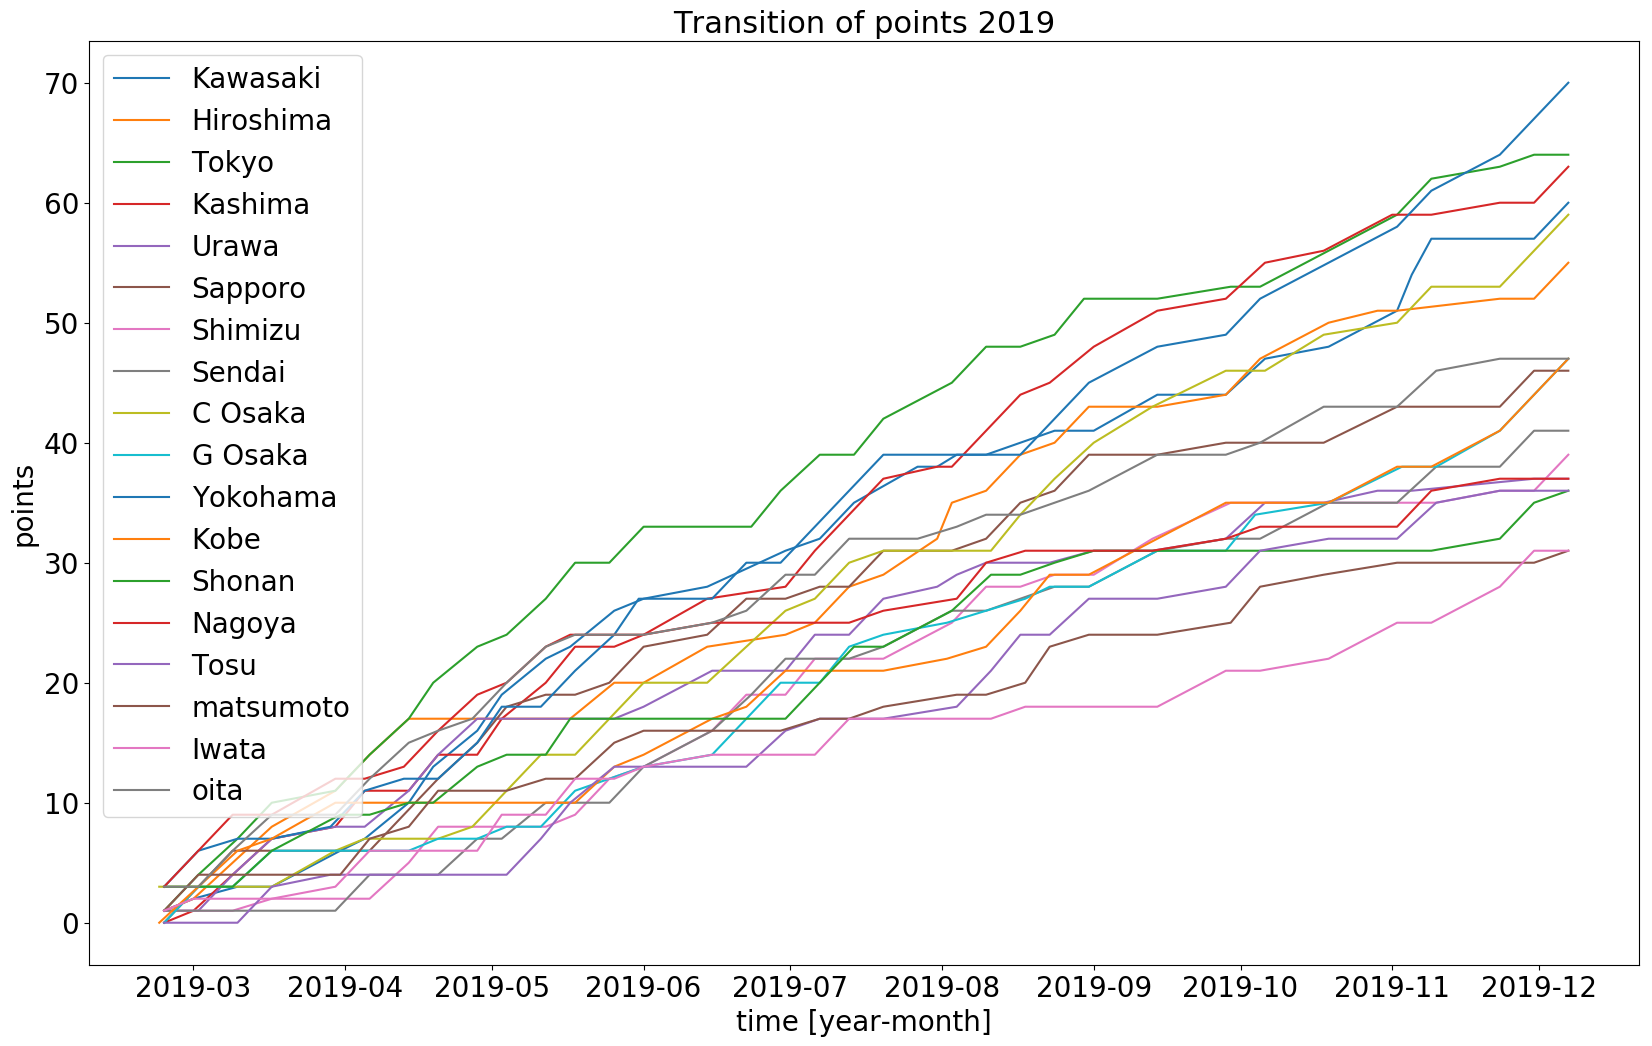

In [39]:

plt.style.use('default')
plt.figure(figsize=(20, 12))

plt.plot(team0['dates'], team0['accum_scores'], label='Kawasaki')
plt.plot(team1['dates'], team1['accum_scores'], label='Hiroshima')
plt.plot(team2['dates'], team2['accum_scores'], label='Tokyo')
plt.plot(team3['dates'], team3['accum_scores'], label='Kashima')
plt.plot(team4['dates'], team4['accum_scores'], label='Urawa')
plt.plot(team5['dates'], team5['accum_scores'], label='Sapporo')
plt.plot(team6['dates'], team6['accum_scores'], label='Shimizu')
plt.plot(team7['dates'], team7['accum_scores'], label='Sendai')
plt.plot(team8['dates'], team8['accum_scores'], label='C Osaka')
plt.plot(team9['dates'], team9['accum_scores'], label='G Osaka')
plt.plot(team10['dates'], team10['accum_scores'], label='Yokohama')
plt.plot(team11['dates'], team11['accum_scores'], label='Kobe')
plt.plot(team12['dates'], team12['accum_scores'], label='Shonan')
plt.plot(team13['dates'], team13['accum_scores'], label='Nagoya')
plt.plot(team14['dates'], team14['accum_scores'], label='Tosu')
plt.plot(team15['dates'], team15['accum_scores'], label='matsumoto')
plt.plot(team16['dates'], team16['accum_scores'], label='Iwata')
plt.plot(team17['dates'], team17['accum_scores'], label='oita')

plt.rcParams["font.size"] = 20
plt.legend()
plt.tick_params(labelsize=20)
plt.xlabel("time [year-month]", fontsize=20)
plt.ylabel("points", fontsize=20)
plt.title("Transition of points 2019", fontsize=22)

仮説：（１）勝ち点をたくさん持っているチーム同士の試合
　　　（２）イニエスタが出る可能性のある試合
   　 （３）優勝を決める（左右する）試合
     （４）順位を決める（左右する）試合

In [40]:
html = urlopen("http://soccer-fam.jp/fmarinos-attendance2019#b")
soup = BeautifulSoup(html)

In [41]:
yokohama=[22751,36216,20688,22667,38561,44210,26046,27364,11186,33673,30898,28304,13590,12581,12962,13627,63854]
kashima=[19463,16659,14163,16844,31182,20700,10208,13502,17442,25117,29790,16063,27285,19314,14439,23195,34312]
fctokyo=[27937,25656,22302,38414,36412,31075,24772,25175,38506,33705,28209,42401,28721,28435,30015,34250,40202]
urawa=[41109,39055,32555,54599,53361,23221,33235,28081,28904,37265,37238,27038,22640,34131,19698,21817,47188]
kobe=[25172,22542,17708,25929,20119,18091,20192,22123,20269,21276,22513,20825,20215,20413,18975,23744,25243]

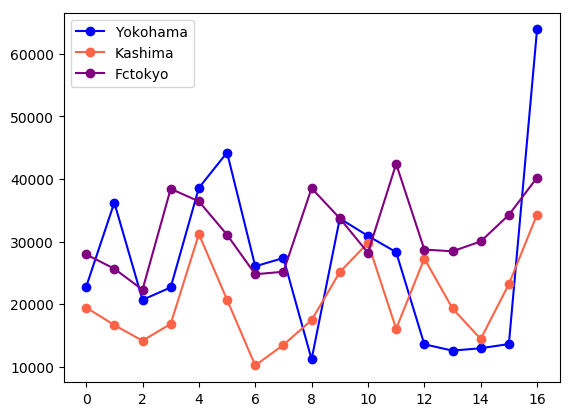

In [72]:
plt.plot(yokohama,marker="o",c="blue",label="Yokohama")
plt.plot(kashima,marker="o",c="tomato",label="Kashima")
plt.plot(fctokyo,marker="o",c="purple",label="Fctokyo")

plt.rcParams["font.size"] = 10

plt.tick_params(labelsize=10)
plt.legend()

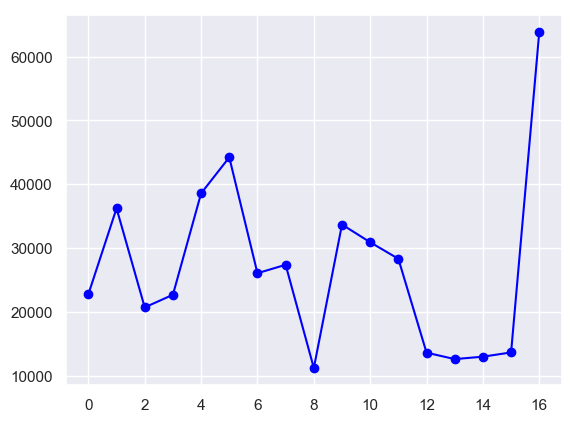

In [103]:
plt.plot(yokohama,marker="o",c="blue",label="Yokohama")

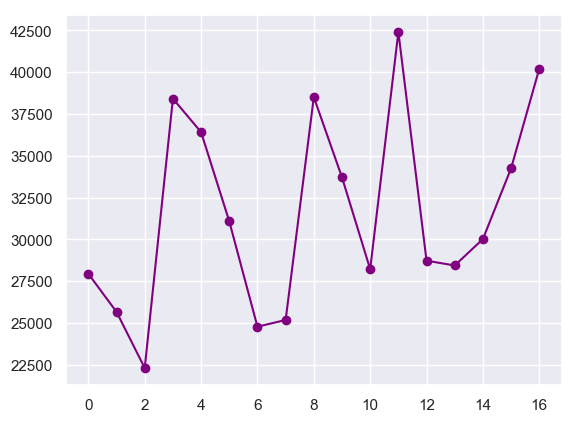

In [102]:
plt.plot(fctokyo,marker="o",c="purple",label="Fctokyo")

In [43]:
import numpy as np
import pandas as pd

In [44]:
k = pd.DataFrame(kashima,columns=["観客数"])
display(k)

,観客数
0,19463
1,16659
2,14163
3,16844
4,31182
5,20700
6,10208
7,13502
8,17442
9,25117


In [45]:
a=k["観客数"]

In [46]:
w=3 #移動平均  moving average
v=np.ones(w)/w
w_half=int((w-1)/2)
kashima_ave=np.convolve(a,v,mode='valid')

In [47]:
kashima_ave

array([16761.66666667, 15888.66666667, 20729.66666667, 22908.66666667,
       20696.66666667, 14803.33333333, 13717.33333333, 18687.        ,
       24116.33333333, 23656.66666667, 24379.33333333, 20887.33333333,
       20346.        , 18982.66666667, 23982.        ])

No handles with labels found to put in legend.


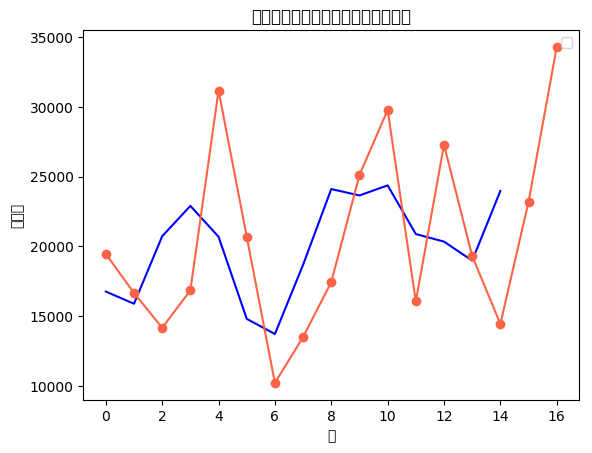

In [48]:
plt.plot(kashima_ave,color="blue")
plt.plot(kashima,color="tomato",marker="o")
plt.xlabel("節")
plt.ylabel("観客数")
plt.title("鹿島アントラーズ　観客動員数推移")
plt.legend()

In [66]:
f = [27010,21788,24766,23896,24222,23088,27496,22946,21038,25684,22057,23682,24039,23663,25713,24674,25123,24380,20826,16718,20028]

In [67]:
f.reverse()
print(f)

[20028, 16718, 20826, 24380, 25123, 24674, 25713, 23663, 24039, 23682, 22057, 25684, 21038, 22946, 27496, 23088, 24222, 23896, 24766, 21788, 27010]


In [90]:
fm = pd.DataFrame(f,columns=["観客数"])
display(fm)

,観客数
0,20028
1,16718
2,20826
3,24380
4,25123
5,24674
6,25713
7,23663
8,24039
9,23682


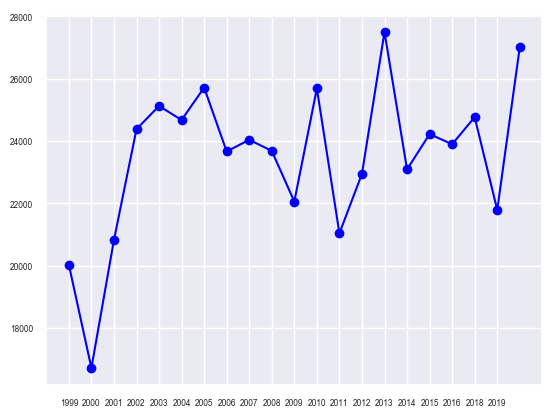

In [91]:
plt.plot(fm,marker="o",c="blue")
plt.xticks([0.0,1.0,2,3,4,5.0,6,7,8,9,10.0,11,12,13,14,15.0,16,17,18,19],["1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2018","2019"])
plt.tick_params(labelsize=6)

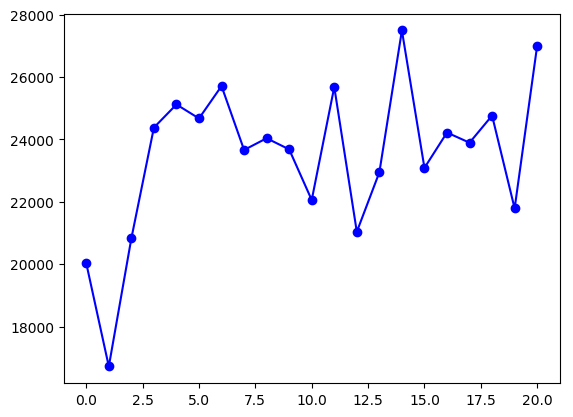

In [74]:
plt.plot(fm,marker="o",c="blue")

In [95]:
f_j = [5,2,13,2,1,1,9,9,7,9,10,8,5,4,2,7,7,10,5,12,1]
fm["順位"] = f_j

In [96]:
display(fm)

,観客数,順位
0,20028,5
1,16718,2
2,20826,13
3,24380,2
4,25123,1
5,24674,1
6,25713,9
7,23663,9
8,24039,7
9,23682,9


In [97]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, preprocessing
import seaborn as sons

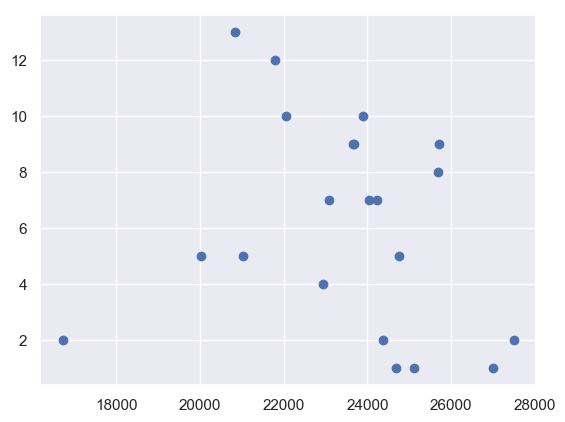

In [98]:
x = fm["観客数"]
y = fm["順位"]
plt.scatter(x,y)
plt.show()

In [100]:
corr_mat = fm.corr(method="pearson")
fm.corr(method="pearson")

,観客数,順位
観客数,1.000000,-0.207072
順位,-0.207072,1.000000


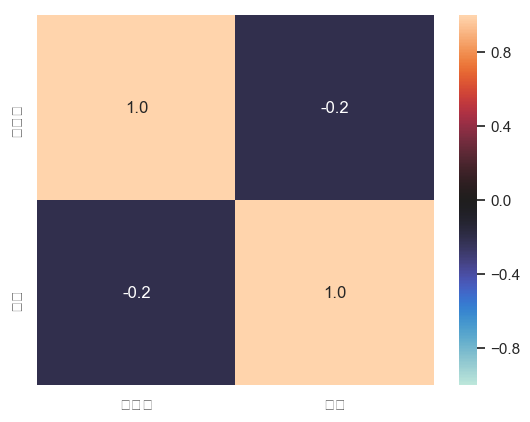

In [101]:
sons.heatmap(corr_mat, vmin=-1.0, vmax=1.0, center=0, annot=True,fmt=".1f", xticklabels=corr_mat.columns.values, yticklabels=corr_mat.columns.values)
plt.show()